## Import NLTKs corpora, books etc.

!python -m nltk.downloader all

In [1]:
import nltk

In [ ]:
# Explore 
nltk.

In [ ]:
# Explore
nltk.corpus.

In [ ]:
nltk.corpus.gutenberg.fileids()

In [2]:
from nltk.book import text4

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
type(text4)

In [ ]:
# text4.

In [ ]:
print text4[:10]

In [ ]:
len(text4)

In [ ]:
len(set([word.lower() for word in text4 if len(word) >= 5]))

In [ ]:
' '.join(text4[:100])

**Exercise:** Search within the first 100 words of text4 and display those that are longer that 8 letters and end in a "g". 

#### Words in context

Search word in text, diasplay the results together with the context:


In [ ]:
text4.concordance?

In [ ]:
# text4.concordance("people")
# text4.concordance("america")

What other words appear in a similar range of contexts? 

In [ ]:
text4.similar?

In [ ]:
text4.similar("America", num=5)

Examine just the contexts that are shared by two or more words:

In [ ]:
text4.common_contexts

In [ ]:
text4.common_contexts(["war", "freedom"], num=5)

Location of a word in the text: how many spaces from the beginning does it appear? 

This positional information can be displayed using a dispersion plot. 

You need NumPy and Matplotlib. 


In [3]:
# Start pylab inline mode, so figures will appear in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
dispersion_plot?

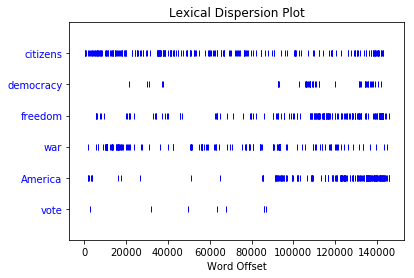

In [4]:
import matplotlib.pyplot as plt

from nltk.draw.dispersion import dispersion_plot
dispersion_plot(text4, ["citizens", "democracy", "freedom", "war", "America", "vote"])

#### Counting
The length of a text from start to finish, in terms of the words and punctuation symbols that appear. All tokens. 







In [5]:
len(text4)

145735

Count how often a word occurs in a text:


In [7]:
text4.count("war")

158

How many distinct words does the book of Genesis contain? 
The vocabulary of a text is just the set of tokens that it uses. 

In [8]:
len(set(text4)) #types

# Each word used on average x times. Richness of the text. 
len(text4) / len(set(text4)) 

14

#### Define functions: 

What do you think they do? 


In [ ]:
def lexical_diversity(text):
    """
    """
    return len(set(text))/float(len(text))

In [ ]:
def percentage(count, total):
    return count/float(total)

Then use the defined functions:

In [ ]:
from __future__ import division #to get precise (float) division in Python 2.x. In Python 3.0 you get it automatically. 
lexical_diversity(text4)

In [ ]:
percentage(text4.count('the'), len(text4)) 

#### Simple statistics

Counting Words Appearing in a Text (a frequency distribution). 


In [9]:
from nltk import FreqDist
fdist1 = FreqDist(text4)
fdist1.items()[:10]

[(u'writings', 1),
 (u'four', 32),
 (u'Does', 1),
 (u'aegis', 3),
 (u'hanging', 1),
 (u'Until', 3),
 (u'aggression', 13),
 (u'looking', 11),
 (u'granting', 1),
 (u'aggregations', 2)]

In [ ]:
vocabulary1 = fdist1.keys() # list of all the distinct types in the text
vocabulary1[:3] # look at first 3

- words that occur only once, called hapaxes: 

In [ ]:
print fdist1.hapaxes()[:20]

 
- words that meet a condition, are long for example
    

In [10]:
V = set(text4)
long_words = [w for w in V if len(w) > 15]
print sorted(long_words)

[u'RESPONSIBILITIES', u'antiphilosophists', u'constitutionally', u'contradistinction', u'discountenancing', u'disqualification', u'enthusiastically', u'instrumentalities', u'internationality', u'irresponsibility', u'misappropriation', u'misrepresentation', u'misunderstanding', u'responsibilities', u'sentimentalizing', u'transcontinental', u'uncharitableness', u'unconstitutional']


- words that characterize a text (are relatively long, and occur frequently)

In [11]:
fdist = FreqDist(text4)
sorted([w for w in set(text4) if len(w) > 12 and fdist[w] > 7])

[u'Administration',
 u'accountability',
 u'administration',
 u'circumstances',
 u'consciousness',
 u'consideration',
 u'considerations',
 u'constitutional',
 u'controversies',
 u'determination',
 u'distinguished',
 u'encouragement',
 u'establishment',
 u'extraordinary',
 u'fortifications',
 u'indispensable',
 u'international',
 u'opportunities',
 u'participation',
 u'recommendations',
 u'representative',
 u'representatives',
 u'responsibilities',
 u'responsibility',
 u'righteousness',
 u'understanding']

#### Conditional frequency distributions

Working with the inaugural corpus:















In [13]:
from nltk.corpus import inaugural
inaugural.fileids()[:2]

print [fileid for fileid in inaugural.fileids()][-10:] 
# Get the first 4 characters of the file IDs

[u'1973-Nixon.txt', u'1977-Carter.txt', u'1981-Reagan.txt', u'1985-Reagan.txt', u'1989-Bush.txt', u'1993-Clinton.txt', u'1997-Clinton.txt', u'2001-Bush.txt', u'2005-Bush.txt', u'2009-Obama.txt']


How are the words "America" and "citizen" are used over time?

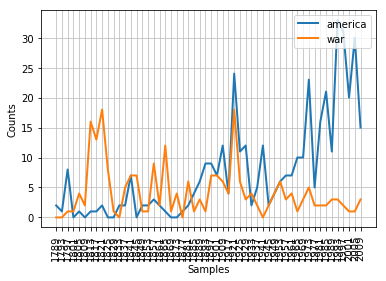

In [14]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'war']
    if w.lower().startswith(target))
cfd.plot()

Working with the news database corpus:


In [ ]:
from nltk.corpus import brown
brown?

In [ ]:
news_words = brown.words(categories="news") 
print(news_words) # get the first words in the corpus

In [ ]:
len(news_words)

In [ ]:
freq = nltk.FreqDist(news_words)
freq.plot(30) # frequency of most commonly used words in the corpus

How are different verbs used in different news genres? 

In [ ]:
from nltk import FreqDist

verbs = ["should", "may", "can"]
genres = ["news", "government", "romance"]
for g in genres:
    words=brown.words(categories=g)
    freq=FreqDist([w.lower() for w in words if w.lower() in verbs])
    print g, freq


#### Stopwords

What percentage of the words in a corpus are NOT stopwords? 


In [ ]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

In [ ]:
def content_fraction(text):
    """
    """
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)


In [ ]:
print content_fraction(nltk.corpus.inaugural.words())

In [ ]:
content_fraction(nltk.corpus.brown.words())

## Importing and accessing your own text

Useful libraries: 

In [ ]:
import nltk, re, pprint
from urllib import urlopen

### User input


In [ ]:
s = raw_input("Enter some text: ")

### Online articles
Getting text out of HTML is a sufficiently common task that NLTK provides a helper function nltk.clean_html(), which takes an HTML string and returns raw text.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url = "http://www.bbc.co.uk/news/education-24367153"
html = urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
raw = BeautifulSoup.get_text(soup)  

In [ ]:
raw = nltk.clean_html(html)
tokens = nltk.word_tokenize(raw)
tokens[:15]

### Online books

In [ ]:
url="http://shakespeare.mit.edu/hamlet/full.html"
html = urlopen(url).read()    
raw = nltk.clean_html(html)  
print raw[:300]

In [ ]:
tokens = nltk.word_tokenize(raw)
type(tokens)
tokens[50:70]

**Exercise:** Find out the type of variable tokens, the length and display tokens from 80 to 100. 

In [ ]:
text = nltk.Text(tokens)
text.collocations()

### Local files
Using local files. 
Upload the following file to Wakari, by clicking the 'Import from web' icon in the upper left side corner:  https://dl.dropboxusercontent.com/u/11117852/UK_natl_2010_en_Lab.txt. Now the file is saved in your account and you can use it in the analysis. 

In [ ]:
ls | grep txt

In [ ]:
!curl https://dl.dropboxusercontent.com/u/11117852/UK_natl_2010_en_Lab.txt > downloaded.txt

In [ ]:
f = open("UK_natl_2010_en_Lab.txt", 'r')
raw = f.read()
print raw[:100]

Tokenize - divide into tokens:

In [ ]:
import sys
import nltk

In [ ]:
tokens = nltk.word_tokenize("And if you listen very hard, the tune will come to you at last.")
tokens[:10]

 Normalize - ignore upper case

In [ ]:
lower_case=set(w.lower() for w in tokens)
print len(lower_case)

Stemming - strip off affixes

In [ ]:
porter = nltk.PorterStemmer()
a=[porter.stem(t) for t in tokens]
a

In [ ]:
lancaster = nltk.LancasterStemmer()
a=[lancaster.stem(t) for t in tokens]
a

Lemmatizing - the word is from a dictionary

In [ ]:
wnl = nltk.WordNetLemmatizer()
a=[wnl.lemmatize(t) for t in tokens]
a

Sentence segmentation:

In [ ]:
sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
sents = sent_tokenizer.tokenize(raw)
pprint.pprint(sents[182:185])

Writing output to file. The file is created in your Wakari directory. Here, we are writing each sentence on a separate line. 

In [ ]:
output_file = open('output.txt', 'w')
sentence = set(sents)
for sent in sorted(sentence):
   output_file.write(sent + "\n")

## Text similarity

We can use both NLTK and scikit-learn for this. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Calculate tf-idf:

In [ ]:
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform(["New Year's Eve in New York",
                            "New Year's Eve in London",
                            "York is closer to London than to New York",
                            "London is closer to Bucharest than to New York"])

Calculate cosine similarity:

In [ ]:
cosine=(tfidf * tfidf.T).A
print cosine

## Trained classification with NLTK

#### Names-gender identification example

In [ ]:
from nltk.corpus import names
import random

Select relevant fearures. Here, last letter of name. 

In [ ]:
def gender_features(word):
    return {'last_letter': word[-1]}

What is the feature for the name Shrek? 

gender_features('Shrek')

What is the feature for your own name? 

In [ ]:
gender_features('iulia')

Train and test data: 

In [ ]:
names = ([(name, 'male') for name in names.words('male.txt')] +
          [(name, 'female') for name in names.words('female.txt')])

Arrange data randomly and extract features

In [ ]:
random.shuffle(names)
featuresets = [(gender_features(n), g) for (n,g) in names]
from nltk.classify import apply_features # use apply if you're working with large corpora

Divide data into training and test sets:

In [ ]:
train_set = apply_features(gender_features, names[500:1000])
test_set = apply_features(gender_features, names[:500])

Use a Naive Bayes Classifier:

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

Classify the test set and evaluate performance

In [ ]:
print nltk.classify.accuracy(classifier, test_set)


What are the most informative features?

In [ ]:
classifier.show_most_informative_features(5)

In [ ]:
Use the algorithm to classify new data:

In [ ]:
classifier.classify(gender_features('iulia'))


In [ ]:
classifier.classify(gender_features('cioroianu'))

#### Exercise: 
    What other features could be relevant?
    Repeat the classification with the first letter of the name as the relevant feature. 
    Compare the accuracy and the most informative features. 
    Test it on your first and middle names. 
    Write all your code in the cell below. 

## Clustering

The example below is based on this one: https://gist.github.com/xim/1279283 (by Morten Neergaard)

In [ ]:
import numpy
from nltk.cluster import KMeansClusterer, GAAClusterer, euclidean_distance
import nltk.corpus
import nltk.stem
stemmer_func = nltk.stem.snowball.SnowballStemmer("english").stem
stopwords = set(nltk.corpus.stopwords.words('english'))

Define normalize function

In [ ]:
def normalize_word(word):
    return stemmer_func(word.lower())

Define feature selection function

In [ ]:
def get_words(titles):
    words = set()
    for title in job_titles:
        for word in title.split():
            words.add(normalize_word(word))
    return list(words)

Define vector space function

In [ ]:
def vectorspaced(title):
    title_components = [normalize_word(word) for word in title.split()]
    return numpy.array([
        word in title_components and not word in stopwords
        for word in words], numpy.short)

Upload example file. The file is here: https://dl.dropboxusercontent.com/u/11117852/example_jobs.txt . 

In [ ]:
title_file = open("example_jobs.txt", 'r')

Get features

In [ ]:
job_titles = [line.strip() for line in title_file.readlines()]
words = get_words(job_titles)
words[0:10]

K-Means clustering: 

In [ ]:
cluster = KMeansClusterer(7, euclidean_distance)
cluster.cluster([vectorspaced(title) for title in job_titles if title])
classified_examples = [cluster.classify(vectorspaced(title)) for title in job_titles]

Print results:

In [ ]:
for cluster_id, title in sorted(zip(classified_examples, job_titles)):
    print cluster_id, title

**Exercise:** Modify the number of clusters and see how the results change. 

**Exercise:** Modify the script above to implement group-average agglomerative clustering, with n classes, instead of K-means clustering. The corresponding NLTK function is: GAAClusterer(n).  